In [18]:
import sys, os
sys.path.append(os.path.join(os.path.dirname('__file__'), '..', 'common'))
import lab_common as lab
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [14]:
def train(X_train,Y_train,X_valid,Y_valid):
    model=OneVsRestClassifier(LogisticRegression(solver="lbfgs",max_iter=1000)).fit(X_train.T,Y_train.T)
    print("train score: {}".format(model.score(X_train.T,Y_train.T)))
    print("validation score: {}".format(model.score(X_valid.T,Y_valid.T)))
    return model

In [15]:
def calc_score_examples_number(X_train,Y_train,X_valid,Y_valid,X_test,Y_test,examples_number):
    score_examples_number={}
    for number in examples_number:
        print("\nsize of the training sample={}".format(number))
        model=train(X_train[:,0:number],Y_train[:,0:number],X_valid,Y_valid)
        score=model.score(X_test.T, Y_test.T)
        print("test score: {}".format(score))
        score_examples_number[number]=score
    return score_examples_number

In [16]:
def plot_dependency_graph(score_examples_number):
    x=[]
    y=[]
    for key in score_examples_number:
        x.append(key)
        y.append(score_examples_number[key])
    plt.plot(x, y)
    plt.xlabel("size of the training sample")
    plt.ylabel("score")
    plt.show()

In [20]:
dataset_url="https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz"
img_height=img_width=28
classes=["A","B","C","D","E","F","G","H","I","J"]

dataset_root_path=lab.extract_dataset(lab.download_dataset(dataset_url))
X,Y=lab.read_dataset(dataset_root_path,classes,img_height,img_width)
   

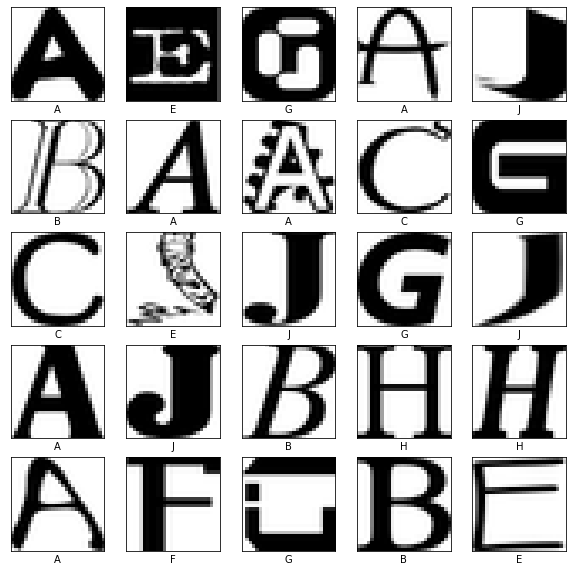

A : 10.00%
B : 10.00%
C : 10.00%
D : 10.00%
E : 10.00%
F : 10.00%
G : 10.00%
H : 10.00%
I : 10.00%
J : 10.00%


In [21]:
lab.show_images(X,Y,classes,img_height,img_width)
lab.show_percentages(Y,classes)
    


size of the training sample=50
train score: 1.0
validation score: 0.5867
test score: 0.5898947368421052

size of the training sample=100
train score: 1.0
validation score: 0.6526
test score: 0.6566842105263158

size of the training sample=1000
train score: 0.992
validation score: 0.7559
test score: 0.7603157894736842

size of the training sample=50000
train score: 0.84334
validation score: 0.8095
test score: 0.818


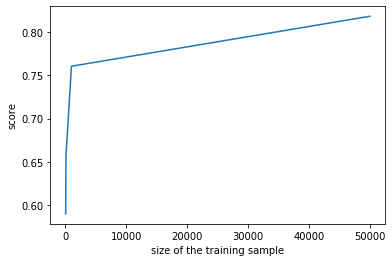

In [22]:
X_train,X_valid,X_test,Y_train,Y_valid,Y_test=lab.split_dataset(X,Y,200000,10000,19000)
plot_dependency_graph(calc_score_examples_number(X_train,Y_train,X_valid,Y_valid,X_test,Y_test,[50,100,1000,50000]))